In [534]:
%config InlineBackend.figure_formats = {'png', 'retina'}

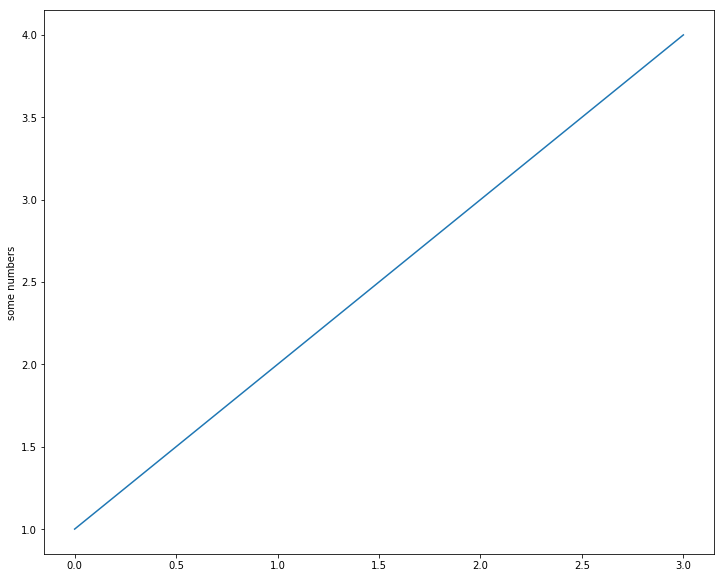

In [3]:
plt.figure(figsize=(12, 10))
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

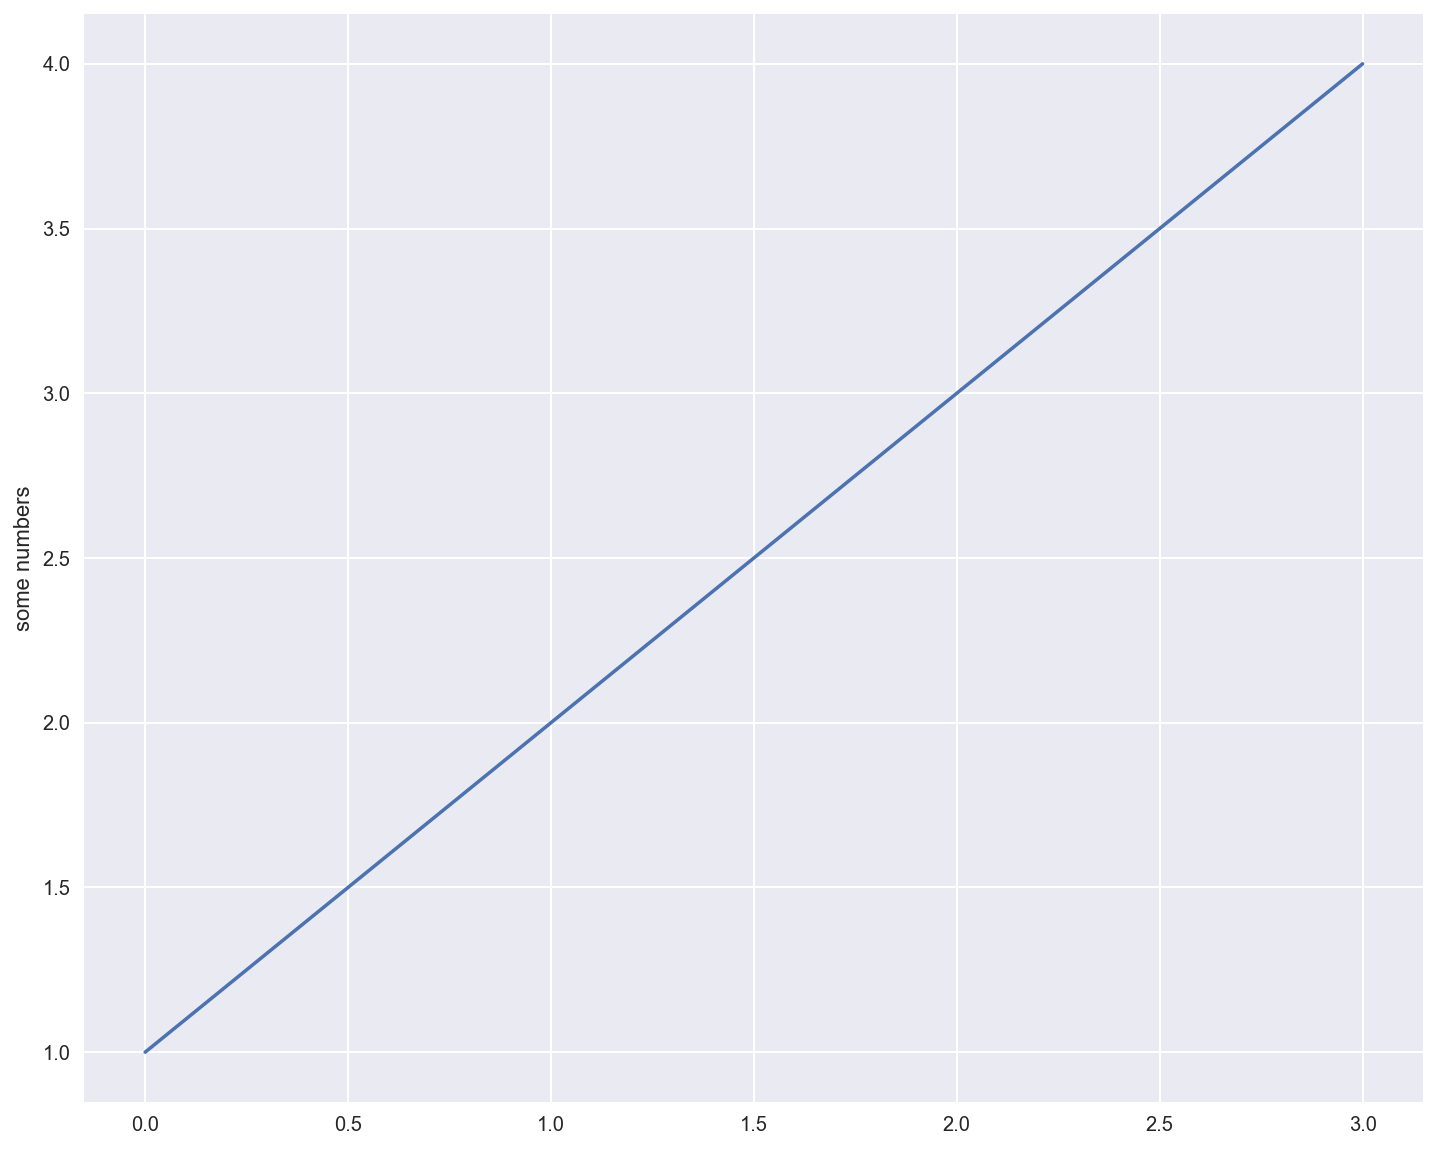

In [536]:
plt.figure(figsize=(12, 10))
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [2]:
from matplotlib import pyplot as plt

In [215]:
from chainer import Variable
import chainer.functions as F
import numpy as np

# Chainer

In [242]:
x1 = Variable(np.array([1.0, 2.0]), name="x1")
x2 = Variable(np.array([3.0, 4.0]), name="x2")
y = x1 + x2
z = y + x1

In [252]:
x1.creator

In [254]:
x1.set_creator(x2)

In [255]:
x1.creator

variable x2([ 3.,  4.])

In [256]:
y

variable([ 4.,  6.])

In [257]:
z

variable([ 5.,  8.])

In [258]:
y.node

In [259]:
y.creator.outputs

(<weakref at 0x125a5f458; to 'VariableNode' at 0x125a4fba8>,)

In [260]:
y.creator.inputs

(<chainer.variable.VariableNode at 0x125a4fda0>,
 <chainer.variable.VariableNode at 0x125a4f080>)

In [248]:
z.node

In [249]:
z.creator.inputs

(<chainer.variable.VariableNode at 0x125a4fba8>,
 <chainer.variable.VariableNode at 0x125a4fda0>)

In [250]:
z.creator.outputs

(<weakref at 0x125a5f728; to 'VariableNode' at 0x125a4fa20>,)

# random

In [95]:
s

(3,)

In [109]:
np.random.random_sample()

0.28105337419500964

In [116]:
eps = np.random.random_sample()
#mu = Variable(np.array([6.551440039982445]))
mu = Variable(np.array([2.0, 3.0, 4.0]))
sigma = [2.0, 3.0]

# Edward

In [288]:
import edward as ed
import tensorflow as tf

from edward.models import Normal as TNormal

from tensorflow.contrib import distributions

In [289]:
a = TNormal(0.0, 1.0, name="a")
b = TNormal(a, 1.0, name="b")
c = TNormal(0.0, 1.0, name="c")
d = TNormal((b*c), 1.0, name="d")
# assert set(ed.get_parents(d)) == set([b, c])

In [290]:
a,b,c,d

(<ed.RandomVariable 'a_5/' shape=() dtype=float32>,
 <ed.RandomVariable 'b_4/' shape=() dtype=float32>,
 <ed.RandomVariable 'c_4/' shape=() dtype=float32>,
 <ed.RandomVariable 'd_4/' shape=() dtype=float32>)

In [291]:
b.get_parents()

[<ed.RandomVariable 'a_5/' shape=() dtype=float32>]

In [292]:
d.get_parents()

[<ed.RandomVariable 'c_4/' shape=() dtype=float32>,
 <ed.RandomVariable 'b_4/' shape=() dtype=float32>]

In [155]:
n = distributions.Normal(name="n", loc=1.0, scale=[2.0, 3.0])

In [108]:
with tf.Session() as sess:
    print(n.sample((2, 1)).eval())

[[[ 2.17316866  2.05335665]]

 [[ 2.36440182 -3.55347729]]]


In [157]:
np.log(2)

0.69314718055994529

In [158]:
from abc import ABCMeta, abstractmethod

# Pyro

In [351]:
%matplotlib inline
# import some dependencies
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set()
except ImportError:
    pass

import torch
from torch.autograd import Variable as Variable

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

torch.manual_seed(101)

In [498]:
def scale(guess):
    # The prior over weight encodes our uncertainty about our guess
    weight = pyro.sample("weight", dist.normal, guess, Variable(torch.ones(1)))
    #print(weight)
    # This encodes our belief about the noisiness of the scale:
    # the measurement fluctuates around the true weight
    return pyro.sample("measurement", dist.normal, weight, Variable(torch.Tensor([0.75])))

In [499]:
guess = Variable(torch.Tensor([8.5]))
scale(guess)

Variable containing:
 9.2564
[torch.FloatTensor of size 1]

In [500]:
posterior = pyro.infer.Importance(scale, num_samples=100)

In [528]:
posterior._traces()

<generator object Importance._traces at 0x1282950a0>

In [524]:
trace = posterior(guess)

In [525]:
trace._traces

AttributeError: 'Trace' object has no attribute '_traces'

In [501]:
marginal = pyro.infer.Marginal(posterior)

In [503]:
marginal(guess)

Variable containing:
 6.8140
[torch.FloatTensor of size 1]

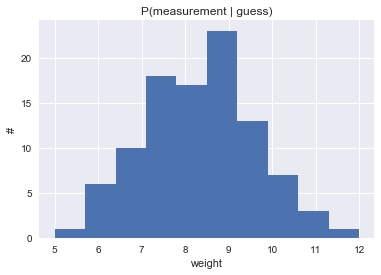

In [531]:
plt.hist([scale(guess).data[0] for _ in range(100)], range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#")

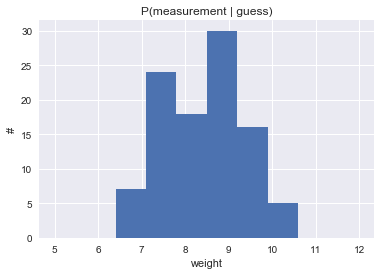

In [533]:
plt.hist([marginal(guess).data[0] for _ in range(100)], range=(5.0, 12.0))
plt.title("P(measurement | guess)")
plt.xlabel("weight")
plt.ylabel("#")

In [316]:
mu = PVariable(torch.Tensor([0.0, 1.0]))
sigma = PVariable(torch.Tensor([1.0, 2.0]))
x = dist.Normal(mu, sigma, batch_size=3)

In [317]:
x.batch_shape()

torch.Size([3])

In [318]:
x.event_shape()

torch.Size([2])

In [319]:
x.shape()

torch.Size([3, 2])

In [320]:
x.batch_shape() + x.event_shape()

torch.Size([3, 2])

In [327]:
torch.Size([3, 2])[1]

2

In [352]:
mu = Variable(torch.zeros(1))   # mean zero
sigma = Variable(torch.ones(1)) # unit variance
x = dist.normal(mu, sigma)      # x is a sample from N(0,1)
x

Variable containing:
-1.2615
[torch.FloatTensor of size 1]

In [348]:
x = pyro.sample("my_sample", dist.normal, mu, sigma)
x

Variable containing:
1.00000e-02 *
  2.4425
[torch.FloatTensor of size 1]

In [342]:
log_p_x = dist.normal.log_pdf(x, mu, sigma)
log_p_x

Variable containing:
-1.4819
[torch.FloatTensor of size 1]

In [346]:
from pyro.poutine import _PYRO_STACK

In [354]:
_PYRO_STACK

[]

In [364]:
def weather():
    cloudy = pyro.sample('cloudy', dist.bernoulli, Variable(torch.Tensor([0.3])))
    cloudy = 'cloudy' if cloudy.data[0] == 1.0 else 'sunny'
    mean_temp = {'cloudy': [55.0], 'sunny': [75.0]}[cloudy]
    sigma_temp = {'cloudy': [10.0], 'sunny': [15.0]}[cloudy]
    temp = pyro.sample('temp', dist.normal, Variable(torch.Tensor(mean_temp)), Variable(torch.Tensor(sigma_temp)))
    return cloudy, temp.data[0]

for _ in range(3):
    print(weather())

('sunny', 97.4092788696289)
('sunny', 87.9808578491211)
('sunny', 72.28497314453125)


In [419]:
res = []
for _ in range(1000):
    c = pyro.sample('cloudy', dist.bernoulli, Variable(torch.Tensor([0.3])))
    res.append(c.data[0])

In [420]:
res.count(1) / len(res)

0.303

In [426]:
def ice_cream_sales():
    cloudy, temp = weather()
    expected_sales = [200] if cloudy == 'sunny' and temp > 80.0 else [50]
    ice_cream = pyro.sample('ice_cream', dist.normal,
                            Variable(torch.Tensor(expected_sales)),
                            Variable(torch.Tensor([10.0])))
    return ice_cream

In [432]:
ices = []
for _ in range(10):
    ice = ice_cream_sales().data[0]
    print(ice)
    ices = ices + [ice]

56.178165435791016
64.83101654052734
52.992645263671875
52.410308837890625
48.728431701660156
40.76344299316406
49.1118278503418
48.10778045654297
45.533172607421875
43.42861557006836


(array([ 25.,  43.,   4.,   0.,   0.,   0.,   0.,   1.,  21.,   6.]),
 array([  26.02066422,   46.12242317,   66.22418213,   86.32594109,
         106.42770004,  126.529459  ,  146.63121796,  166.73297691,
         186.83473587,  206.93649483,  227.03825378]),
 <a list of 10 Patch objects>)

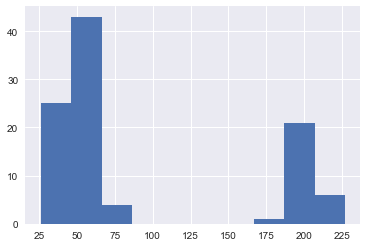

In [441]:
plt.hist([ice_cream_sales().data[0] for _ in range(100)])

In [480]:
def geometric(p, t=None):
    if t is None:
        t = 0
    x = pyro.sample("x_{}".format(t), dist.bernoulli, p)
    if torch.equal(x.data, torch.zeros(1)): # x == 0
        return x
    else: # x == 1
        return x + geometric(p, t+1)

In [481]:
for _ in range(3):
    g = geometric(Variable(torch.Tensor([0.5])))
    print(g.data[0])

1.0
0.0
0.0


(array([ 53.,   0.,  24.,   0.,  10.,   0.,   9.,   0.,   2.,   2.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

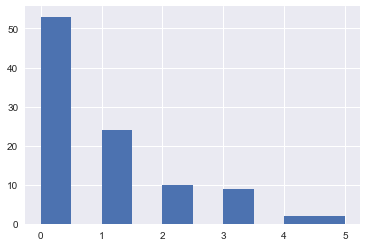

In [483]:
plt.hist([geometric(Variable(torch.Tensor([0.5]))).data[0] for _ in range(100)])